In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split


In [2]:
# generate dataset
# X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
X, y = make_moons(n_samples=500, noise=0.2, random_state=7)
print(X.shape)
# split dataset 
# train: 70% val: 10% test: 20% = 100%
# extract train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=17)
# 
# correct shape
X_train = X_train.T
y_train = y_train.reshape((1,X_train.shape[1]))

m = X_train.shape[1] # num samples
n = X_train.shape[0] # num features

# test and val datasets
X_test = X_test.T
y_test = y_test.reshape((1,X_test.shape[1]))

X_val = X_val.T
y_val = y_val.reshape((1,X_val.shape[1]))

print(f'train: X: {X_train.shape} y: {y_train.shape}')
print(f'test: X: {X_test.shape} y: {y_test.shape}')
print(f'val: X: {X_val.shape} y: {y_val.shape}')

(500, 2)
train: X: (2, 350) y: (1, 350)
test: X: (2, 105) y: (1, 105)
val: X: (2, 45) y: (1, 45)


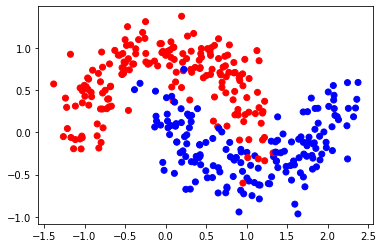

In [3]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[0,:], X_train[1,:], c=y_train, cmap=cm_bright)
plt.show()

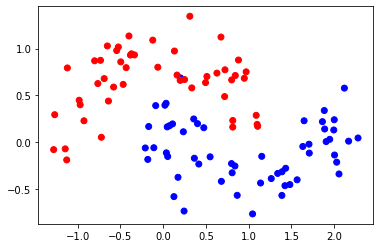

In [4]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_test[0,:], X_test[1,:], c=y_test, cmap=cm_bright)
plt.show()

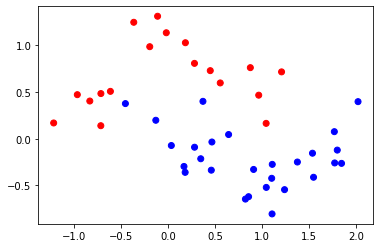

In [5]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_val[0,:], X_val[1,:], c=y_val, cmap=cm_bright)
plt.show()

In [6]:
# regresion logistica
w = np.random.rand(n, 1)
b = np.random.rand(1, 1)
print(w.shape)

(2, 1)


$$Z = w^T * X + b$$
$$\hat{y} = \sigma(Z) = \frac{1}{1 + \exp^{-z}}$$

In [7]:
def Z(X, w, b):
    return np.dot(w.T, X) + b

def sigma(z):
    return 1 / (1 + np.exp(-z))

$$dZ = \hat{y} - y$$
$$dw = \frac{1}{m}X * dZ^T$$
$$db = \frac{1}{m}np.sum(dZ)$$

In [8]:
def dw(X, dz):
    return (1 / m) * np.dot(X, dz.T)
def db(dz):
    return (1 / m) * np.sum(dz)
    

Repetir:

$$w := w - \alpha dw$$
$$b := b - \alpha db$$


In [ ]:
# calculo del error
preds = sigma(Z(X_test, w, b))
print(preds.shape)
error = np.sum((preds - y_test)**2)
print(error)

In [9]:
def obtener_precision(preds, y):
    if y.shape != preds.shape:
        print('error, los arrays deben ser de la misma dimension!')
        return
    # redondear preds
    preds_red = (preds > 0.5).astype(int)
    n_samples = y.shape[1]
    return np.sum(np.equal(preds_red, y)) / n_samples

In [ ]:
A = np.array([[0.8, 0.2, 0.9, 0.1, 0.1, 0.01, 0.85]])
A_red = A > 0.5
print(A_red)
B = np.array([[1, 0, 1, 0, 1, 0, 0]])
correct = np.sum(np.equal(A_red, B))
print(f'porcentaje: {correct / 7}')
print(f'porcentaje con funcion: {obtener_precision(A, B)}')

error porcentual de entrenamiento final: 14.57%
error porcentual de test final: 15.24%


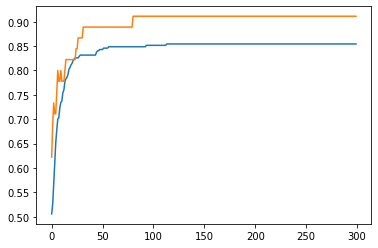

In [36]:
# descenso de gradiente
# inicializacion de pesos
w = np.random.rand(n, 1)
b = np.random.rand(1, 1)

# hiperparametros
alpha = 0.7 # learning rate
n_iters = 300

# print(f'pesos iniciales: {w} {b}')
# error inicial
preds = sigma(Z(X_train, w, b))
# print(predrds.shape, y_train.shape)
# print(f'error porcentual de entrenamiento inicial: {((1 - obtener_precision(preds, y_train))*100):.2f}%')
# print(f'error porcentual de test inicial: {((1 - obtener_precision(sigma(Z(X_test, w, b)), y_test))*100):.2f}%')

# historial
precision_train = []
precision_val = []
# bucle de entrenamiento
for i in range(n_iters):
    # forward pass
    y_hat = sigma(Z(X_train, w, b))
    # gradientes (backward pass)
    dZ = y_hat - y_train
    d_w = dw(X_train, dZ)
    d_b = db(dZ)
    # actualizacion
    w = w - alpha * d_w
    b = b - alpha * d_b
    # calcular precision de validacion
    val_preds = sigma(Z(X_val, w, b))
    precision_val.append(obtener_precision(val_preds, y_val))
    # agregar precision de train
    precision_train.append(obtener_precision(y_hat, y_train))
    # dibujar en cada 10 iteraciones
    # if i % n_iters//10 == 0:
    #     dibujar_linea(w, b, X_train, y_train)
        # input()
        # plt.show()

# dibujar_linea(w, b, X_train, y_train)
# precision final
preds = sigma(Z(X_train, w, b))

print(f'error porcentual de entrenamiento final: {((1 - obtener_precision(preds, y_train)) * 100):.2f}%')
print(f'error porcentual de test final: {((1 - obtener_precision(sigma(Z(X_test, w, b)), y_test)) * 100):.2f}%')
plt.plot(precision_train)
plt.plot(precision_val)

In [ ]:
plt.plot(precision_train)
plt.plot(precision_val)

In [11]:
def dibujar_linea(w, b, X, y):
    c = (-b/w[1,0])[0]
    m = - w[0,0]/w[1,0]
    x_min, x_max = -1.5, 2.5
    y_min, y_max = -1.0, 1.5
    xd = np.array([x_min, x_max])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[0,:], X[1,:], c=y, cmap=cm_bright)

In [ ]:
print('w', w)
print('b', b)

w = np.random.rand(n, 1)
b = np.random.rand(1, 1)

c = (-b/w[1,0])[0]
m = - w[0,0]/w[1,0]
print('c', c)
print('m', m)
x_min, x_max = -1.5, 2.5
y_min, y_max = -1.0, 1.5

xd = np.array([x_min, x_max])
yd = m*xd + c
print(xd, yd)
plt.plot(xd, yd, 'k', lw=1, ls='--')
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_test[0,:], X_test[1,:], c=y_test, cmap=cm_bright)
#plt.fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
#plt.fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)